In [2]:
from dstk.imputation import DefaultImputer
import os
import pandas as pd
import numpy as np
import re
import pickle
from scf_impute import analysis_variables
from scipy import stats
import matplotlib
import missingno as msno
%matplotlib inline

/Users/manu/anaconda3/envs/gdal2/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
DATA_FOLDER = 'data'
dct_param = {'data': os.path.join('..', 'data'),
             'missing_val': 'nan'}

In [4]:
with open(os.path.join(DATA_FOLDER, 'variables.pickle'), 'rb') as handle:
        dct_data = pickle.load(handle)

In [5]:
df_raw_data = dct_data['df_raw_data']

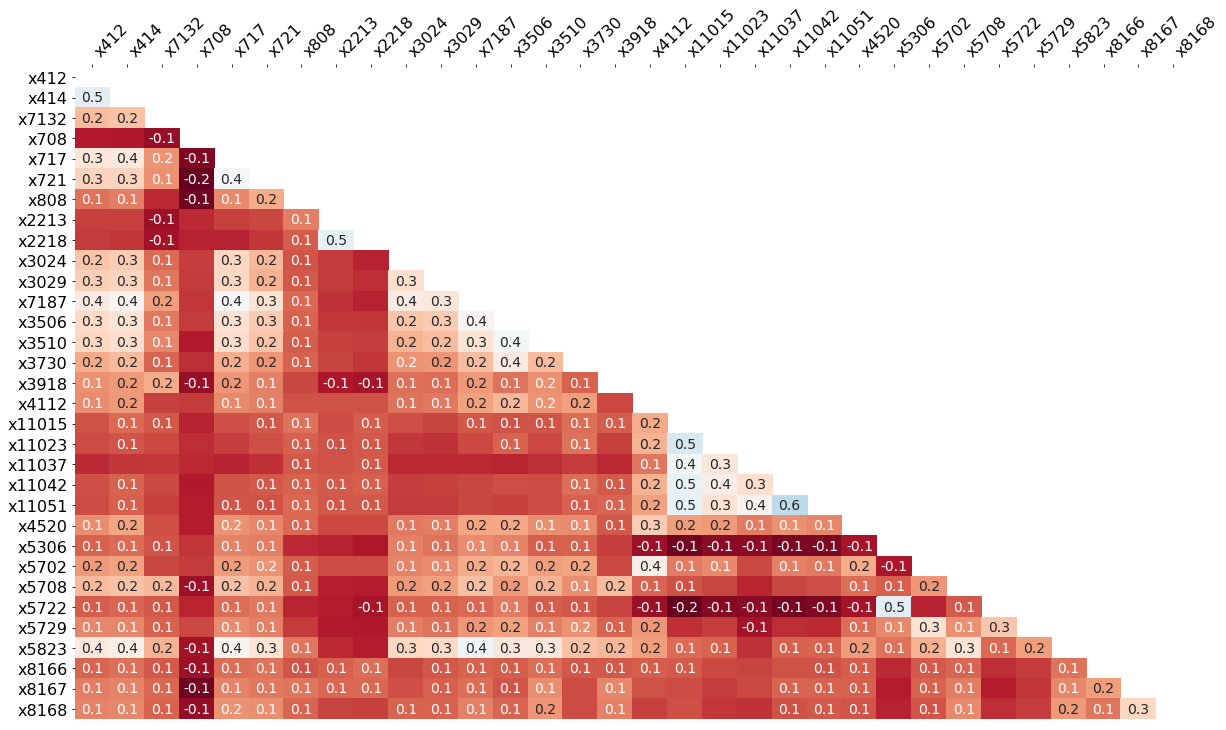

In [6]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', n=50, p=0.9)
msno.heatmap(filtered_data)

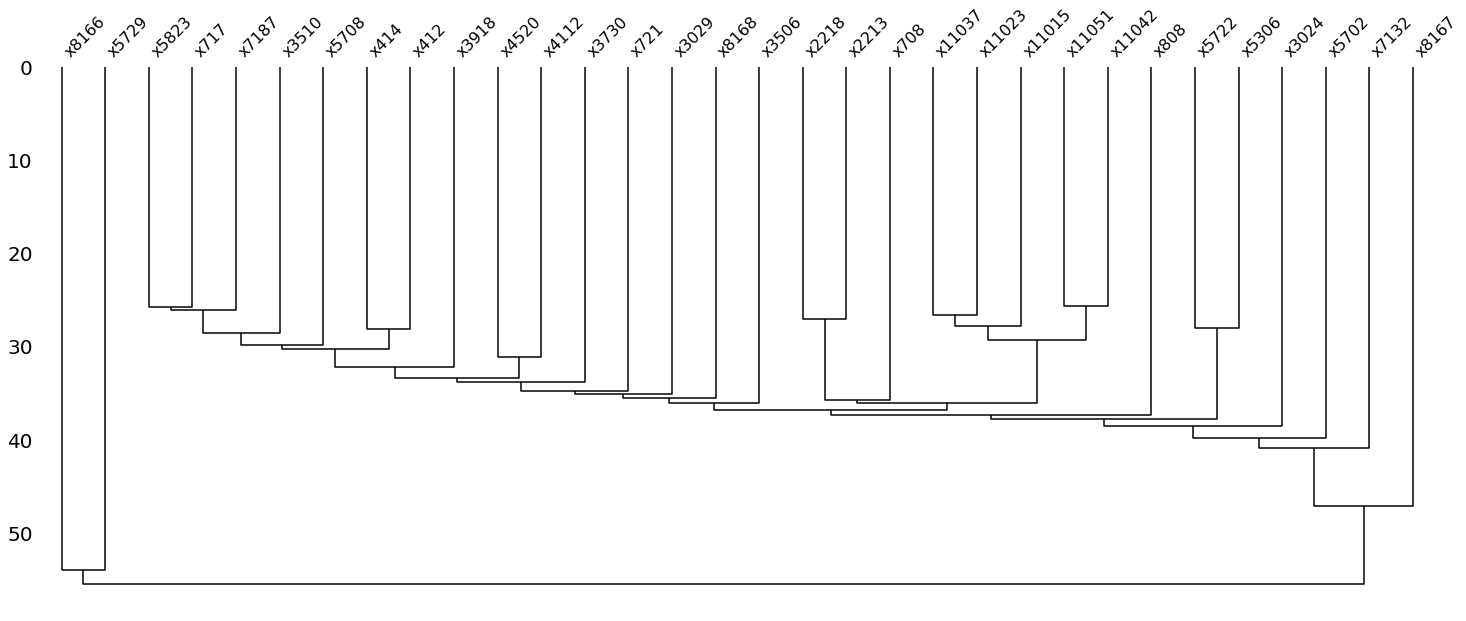

In [7]:
filtered_data = msno.nullity_filter(df_raw_data, filter='bottom', p=0.9)
msno.dendrogram(filtered_data)

# MSE Calculation

In [79]:
from sklearn.metrics import mean_squared_error, accuracy_score

def get_mse(df_full_data, df_imputed, lst_num_cols, df_removed):
    df_full_scaled, df_col_mu_std = scale(df_full_data, lst_num_cols)
    df_imputed_scaled = scale_imputed(df_imputed, df_col_mu_std, lst_num_cols)
    
    y = pd.DataFrame(columns=('imputed', 'actual', 'row', 'col'))
    
    for col in set(lst_num_cols).intersection(set(df_removed.columns)):
        y = y.append(pd.DataFrame({'imputed': df_imputed_scaled.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values,
                        'actual': df_full_scaled.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values,
                                    'row': np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','),
                                    'col': [col] * np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=',').size}))
        
    return y, mean_squared_error(y['actual'], y['imputed'])

def get_accuracy(df_full_data, df_imputed, lst_char_cols, df_removed):
    
    y = pd.DataFrame(columns=['col', 'accuracy'])
    for col in set(lst_char_cols).intersection(set(df_full_data.columns)):
        actual = df_full_data.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values
        imputed = df_imputed.loc[np.fromstring(str(df_removed[col].values[0]), dtype=int, sep=','), col].values
        
        
        y = y.append(pd.DataFrame({'col': col,
                      'accuracy': accuracy_score(actual, imputed)}, index=[min(0, y.shape[0] - 1)]))
        
    return y, y['accuracy'].mean()
        

def scale(df_raw_data, lst_num_cols):
    df_col_mu_std = pd.DataFrame(columns=['mean', 'std'])
    for col in lst_num_cols:
        if col in df_raw_data.columns:
            mu = df_raw_data[col].mean(skipna=True)
            std = df_raw_data[col].std(skipna=True)
            df_col_mu_std = df_col_mu_std.append(pd.DataFrame({'mean': mu,
                                               'std': std},
                                              index=[col]))
            df_raw_data[col] = (df_raw_data[col] - mu) / std

    return df_raw_data, df_col_mu_std

def scale_imputed(df_raw_data, df_col_mu_std, lst_num_cols):
    for col in lst_num_cols:
        if col in df_col_mu_std.index:
            mu = df_col_mu_std.loc[col, 'mean']
            std = df_col_mu_std.loc[col, 'std']
            df_raw_data[col] = (df_raw_data[col] - mu) / std
            
    return df_raw_data

In [72]:
lst_num_cols = dct_data['lst_num_cols']
lst_char_cols = dct_data['lst_char_cols']
df_removed = pd.read_csv(os.path.join('data', 'withheld_old.csv'))
df_full_data = pd.read_csv(os.path.join('data', 'full_cleaned_old.csv'), index_col=0)
df_imputed = pd.read_csv(os.path.join('data', 'knn_imputed_1.csv'), index_col=0)

In [73]:
y, mse = get_mse(df_full_data, df_imputed, lst_num_cols, df_removed)

In [80]:
y, m_accuracy = get_accuracy(df_full_data, df_imputed, lst_char_cols, df_removed)

KeyError: 'x3220'

In [81]:
str(df_removed['x3220'].values[0])

KeyError: 'x3220'

In [82]:
df_removed['x3220']

KeyError: 'x3220'

In [ ]:
actual = df_full_data.loc[np.fromstring(str(df_removed['x3220'].values[0]), dtype=int, sep=','), col].values
        imputed = df_imputed.loc[np.fromstring(str(df_removed['x3220'].values[0]), dtype=int, sep=','), col].values
        